In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import dataframe_image as dfi

df = pd.read_csv("SydneyHousePrices.csv")
df

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house
...,...,...,...,...,...,...,...,...,...
199499,2014-06-20,199500,Illawong,2234,1900000,5.0,3,7.0,house
199500,2014-05-26,199501,Illawong,2234,980000,4.0,3,2.0,house
199501,2014-04-17,199502,Alfords Point,2234,850000,4.0,2,2.0,house
199502,2013-09-07,199503,Illawong,2234,640000,3.0,2,2.0,townhouse


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


In [3]:
df.isnull().sum()

Date              0
Id                0
suburb            0
postalCode        0
sellPrice         0
bed             154
bath              0
car           18151
propType          0
dtype: int64

In [4]:
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [5]:
df['car'].fillna(0, inplace=True)
df.dropna(how='any', subset=['bed'], inplace=True)

In [43]:
df.isnull().sum()

Date          0
Id            0
suburb        0
postalCode    0
sellPrice     0
bed           0
bath          0
car           0
propType      0
Year          0
Month         0
Day           0
dtype: int64

In [6]:
df=df.drop(["Id", "Date"],axis=1)

In [10]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

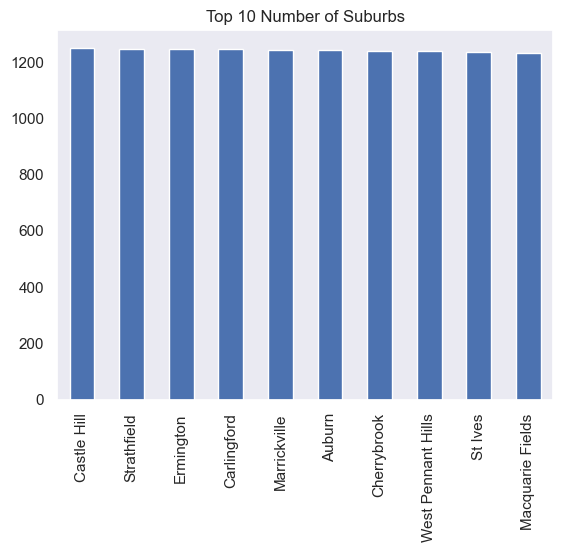

<Figure size 640x480 with 0 Axes>

In [38]:
#plt.figure(figsize=(15,6))
df["suburb"].value_counts()[:10].plot.bar()
sns.set_theme(style="dark")
plt.title("Top 10 Number of Suburbs")
plt.xticks(rotation=90)
plt.show()
plt.savefig('abcaa.png')

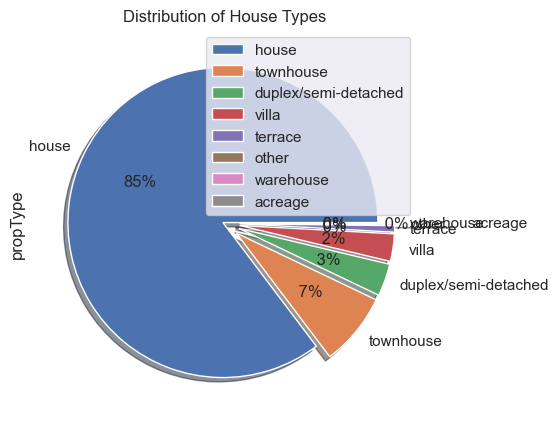

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(5,10))
explode=[0.01,0.1,0.1,0.1,0.1,0.1,0.1,0.5]
df['propType'].value_counts().plot(kind='pie',autopct="%2i%%",shadow=True, explode=explode)
plt.title('Distribution of House Types')
plt.legend()
plt.show()
plt.savefig('pie1.png')

In [29]:
data_num=df.select_dtypes(["float64","int64"]).columns

C:\Users\dlatl\AppData\Local\Temp\ipykernel_9996\1918077573.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[data_num[count]],ax=ax[i][j],shade=True)
C:\Users\dlatl\AppData\Local\Temp\ipykernel_9996\1918077573.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[data_num[count]],ax=ax[i][j],shade=True)
C:\Users\dlatl\AppData\Local\Temp\ipykernel_9996\1918077573.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[data_num[count]],ax=ax[i][j],shade=True)
C:\Users\dlatl\AppData\Local\Temp\ipykernel_9996\1918077573.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will 

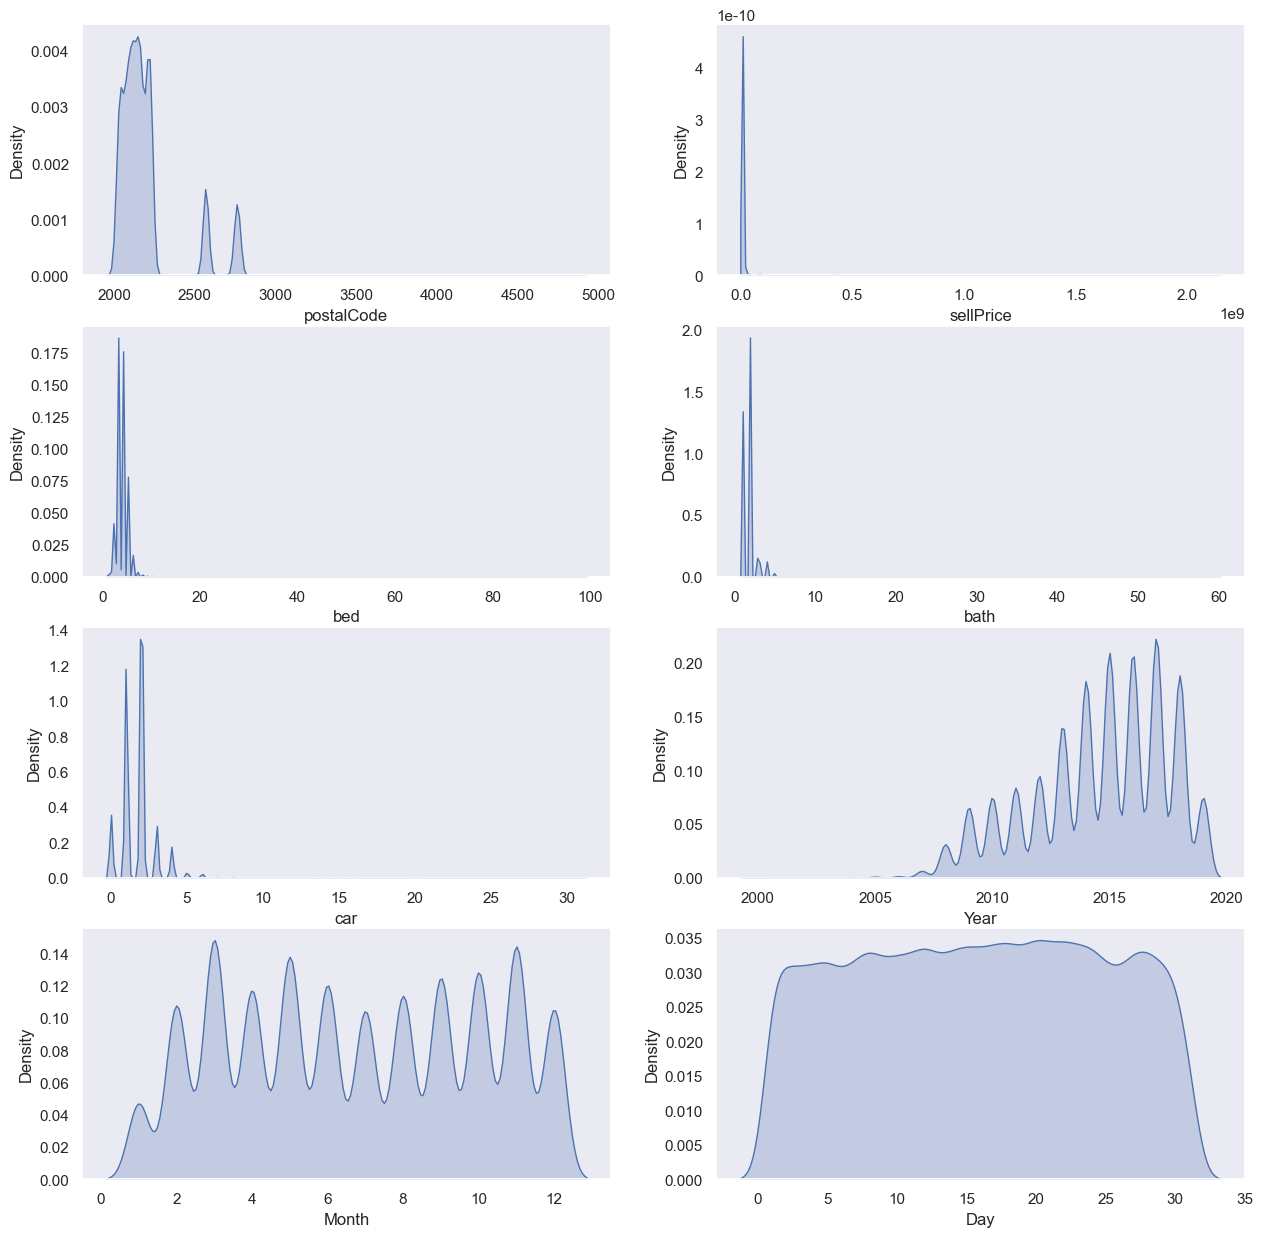

In [33]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(15,15))
count=0
for i in range(4):
    for j in range(2):
        sns.kdeplot(df[data_num[count]],ax=ax[i][j],shade=True)
        count+=1

plt.savefig('asdd.png')

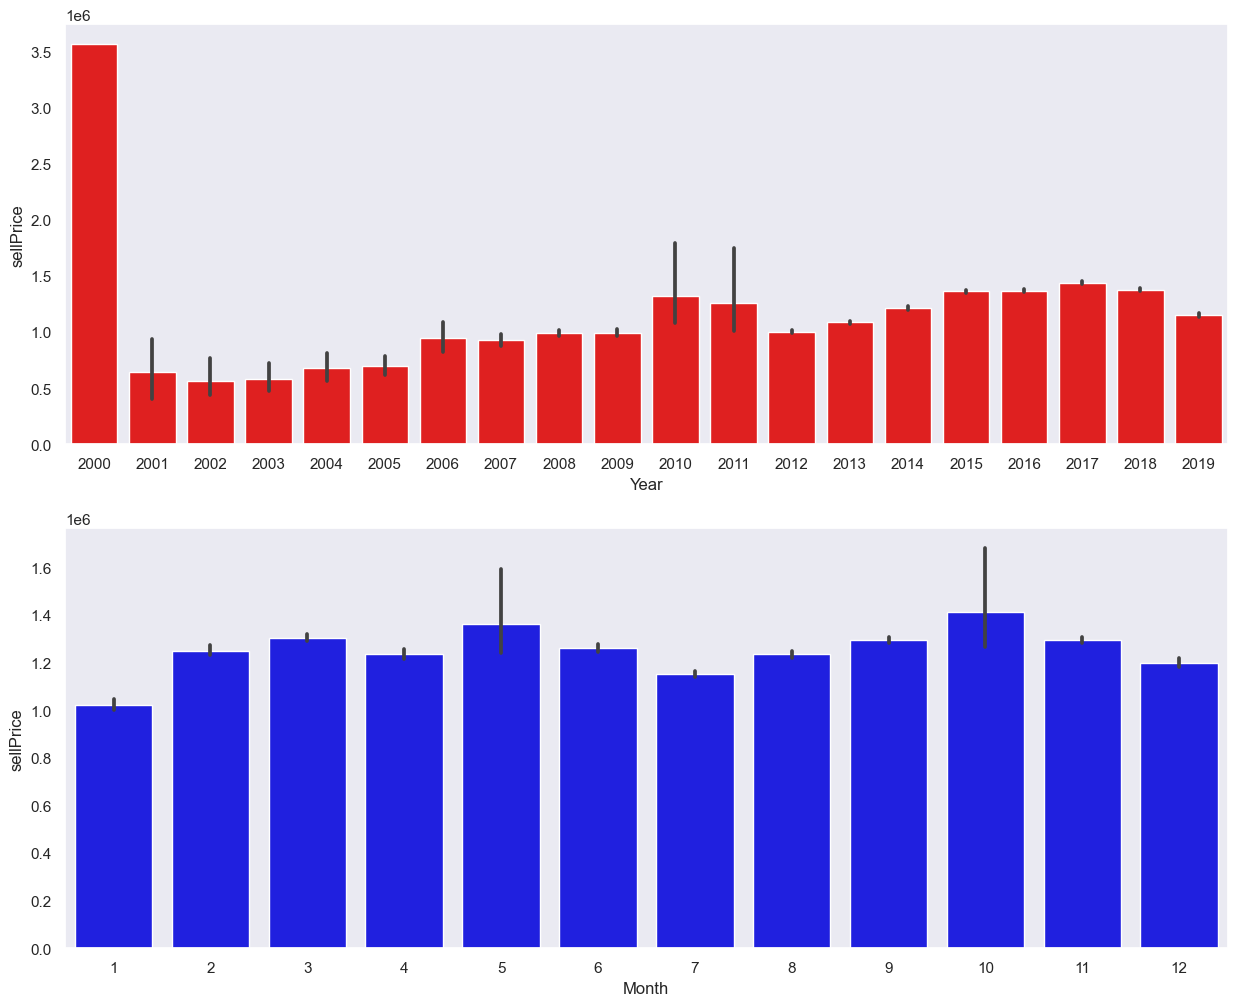

In [36]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,12))
sns.barplot(data=df,x="Year",y="sellPrice",color="red",ax=ax[0])
sns.barplot(data=df,x="Month",y="sellPrice",color="blue",ax=ax[1])
plt.savefig('1222.png')

C:\Users\dlatl\AppData\Local\Temp\ipykernel_9996\1908164954.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df,x="Year",y="sellPrice",hue="propType",ax=ax[0],ci=None)
C:\Users\dlatl\AppData\Local\Temp\ipykernel_9996\1908164954.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df,x="Month",y="sellPrice",hue="propType",ax=ax[1],ci=None)


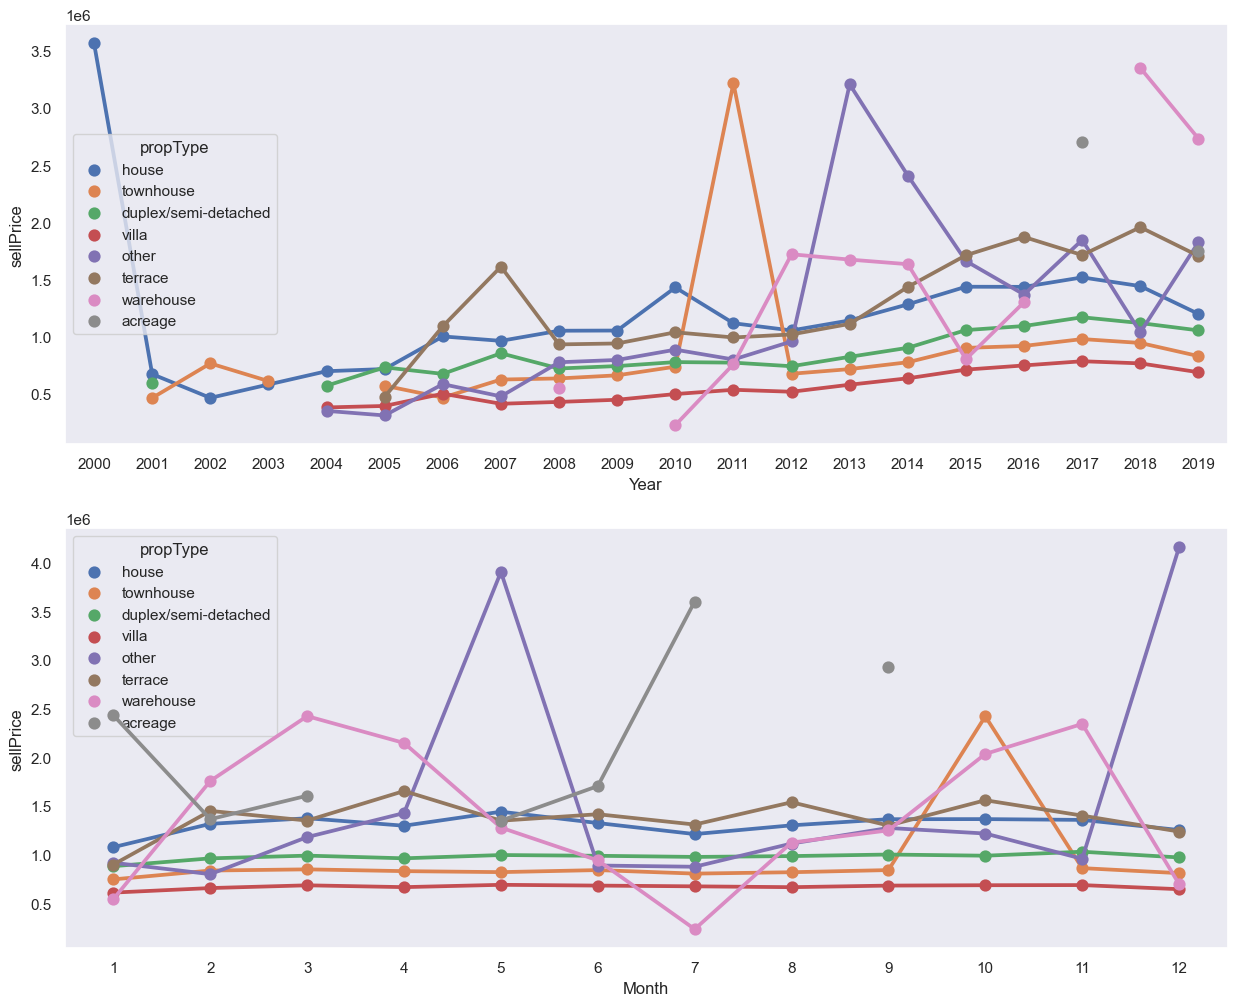

In [37]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,12))
sns.pointplot(data=df,x="Year",y="sellPrice",hue="propType",ax=ax[0],ci=None)
sns.pointplot(data=df,x="Month",y="sellPrice",hue="propType",ax=ax[1],ci=None)
plt.savefig('1223.png')